In [34]:
import faiss                   # make faiss available
import numpy as np
import time

d = 70                           # dimension
k = 4                          # we want to see 4 nearest neighbors
M = 10                         # number of neighbors used in the graph. A larger M is more accurate but uses more memory

number_of_database_list = []
create_index_time_list = []

def experiment(number_of_database):
    
    nb = number_of_database                      # database size
    nq = 10000                       # nb of queries
    np.random.seed(1234)             # make reproducible
    xb = np.random.random((nb, d)).astype('float32')
    xb[:, 0] += np.arange(nb) / 1000.
    xq = np.random.random((nq, d)).astype('float32')
    xq[:, 0] += np.arange(nq) / 1000.

    start = time.time()
    index = faiss.IndexHNSWFlat(d, M)   # build the index
    print(index.is_trained)
    index.add(xb)                  # add vectors to the index
    end = time.time()
    print(f"Runtime of the create index is {end - start}(s), {(end - start)/60}(mins)")
    
    number_of_database_list.append(number_of_database)
    create_index_time_list.append(end - start)

    start = time.time()
    D, I = index.search(xb[:5], k) # sanity check
    end = time.time()
    print(f"Runtime of the sanity query is {end - start}")

    start = time.time()
    D, I = index.search(xq, k)     # actual search
    end = time.time()
    print(f"Runtime of the actualy uery  is {end - start}")
    

In [35]:
experiment(1000000)  # 1M 

True
Runtime of the create index is 5.4142680168151855(s), 0.09023780028025309(mins)
Runtime of the sanity query is 0.0004303455352783203
Runtime of the actualy uery  is 0.008011817932128906


In [4]:
experiment(10000000)  # 10M

True
Runtime of the create index is 62.872276306152344(s), 1.0478712717692058(mins)
Runtime of the sanity query is 0.0036978721618652344
Runtime of the actualy uery  is 0.014241218566894531


In [6]:
experiment(100000000)  # 100M

True
Runtime of the create index is 1003.2077281475067(s), 16.720128802458444(mins)
Runtime of the sanity query is 0.270108699798584
Runtime of the actualy uery  is 0.31888556480407715


In [7]:
experiment(300000000)  # 300M

True
Runtime of the create index is 5788.728886604309(s), 96.47881477673849(mins)
Runtime of the sanity query is 0.8010478019714355
Runtime of the actualy uery  is 0.9395041465759277


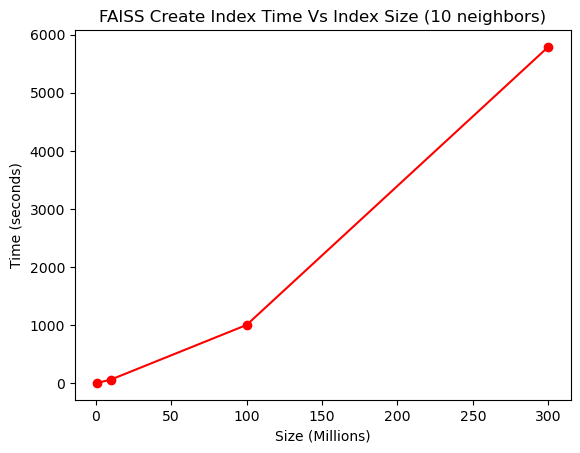

In [33]:
import matplotlib.pyplot as plt

size = [x/1000000 for x in number_of_database_list]

plt.plot(size, create_index_time_list, color='red', marker='o')
plt.title('FAISS Create Index Time Vs Index Size (10 neighbors)')
plt.xlabel('Size (Millions)')
plt.ylabel('Time (seconds)')
plt.show()